In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [3]:
df_c = pd.read_csv('Customers.csv')
df_p = pd.read_csv('Products.csv')
df_t = pd.read_csv('Transactions.csv')

In [4]:
df_c.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
df_p.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
df_t.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# Task 3: Customer Segmentation / Clustering

In [ ]:
# We already have features from taks 2
df_features.head()

In [ ]:
# Extractinf features for clustering
X = df_features.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'])

In [ ]:
# Elbow Method to find optimal number of clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

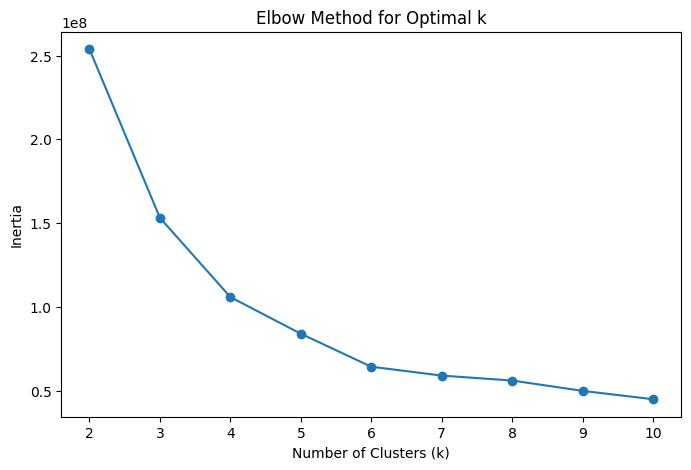

In [ ]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_features['Cluster'] = kmeans.fit_predict(X)

df_c['Cluster'] = df_features['Cluster']

In [ ]:
# DB Index
db_index = davies_bouldin_score(X, df_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Silhouette Score
silhouette_avg = silhouette_score(X, df_features['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

- Davies-Bouldin Index: 0.81
- Silhouette Score: 0.38

In [ ]:
# Reducing dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# Adding PCA components to the dataframe
df_features['PCA1'] = X_pca[:, 0]
df_features['PCA2'] = X_pca[:, 1]

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in df_features['Cluster'].unique():
    plt.scatter(
        df_features[df_features['Cluster'] == cluster]['PCA1'],
        df_features[df_features['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}'
    )
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation Clusters')
plt.legend()
plt.show()

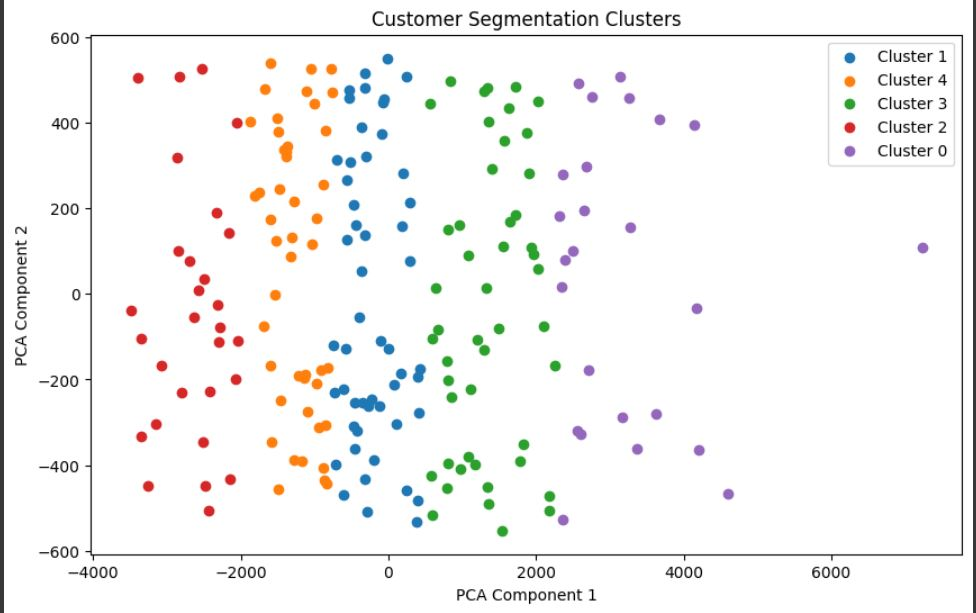